# 1) Import the required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 

# 2) Load the Dataset

In [2]:
habermans = pd.read_csv("haberman.csv")

In [3]:
# Lets observ the number of data points 
print(habermans.shape)

(306, 4)


In [4]:
# Columns inside the dataset
habermans.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
# Lets print top 10 rows from the dataset
habermans.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [6]:
# So far "age", "year","nodes" and "status" seems to be a numerical features

In [7]:
# Lets check whether the habermans dataset is balanced or imbalanced dataset
habermans['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [8]:
# So we have 225 instances that belongs to status/class 1 and 81 instance that belongs to the status/class 2
# The total ratio of the number of instances of status 1 to status 2 is 2.778 approx. 
# So this is highly imbalanced dataset
print(225/81)

2.7777777777777777


# 3) Basic Stats about the Habermans Dataset

In [9]:
# From the Kaggle link given in the description of the assigment in classroom, The Habermans dataset is about the survival of the
# patients who had undergone surgery of breast cancer
# Information taken from kaggle, 
# Attribute Information:

# "age" - Age of patient at time of operation (numerical)
# "year" - Patient's year of operation (year - 1900, numerical)
# "nodes" -Number of positive axillary nodes detected (numerical)
# "status" - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [10]:
# Lets Check for the number of Null values
print(habermans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [11]:
# From the information we do not have any null values in our dataset
# So we do not need to undergo any Imputation technique to address the null values, Hurray!!
# All the data/features are integers with status set to binary with values "1" and "2" 

In [12]:
# Lets capture some standard information about the dataset
habermans.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [13]:
# The Inferences from the above information
# The maximum age variation is from 30 to 83 years and mean @ 52.45 approx.
# min number of nodes are 0 and Maximum nodes present are 5
# Nearly 75% of the people approximately having 5 or less thant 5 nodes and about 25% are having zero nodes

# 4) 2-D scatter plot

# 4.1) Plots between "age" v/s "year"

No handles with labels found to put in legend.


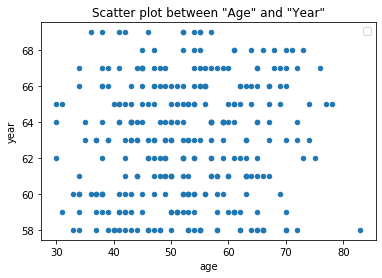

In [14]:
habermans.plot(kind='scatter',x='age',y='year')
plt.title('Scatter plot between "Age" and "Year"')
plt.legend()
plt.show()

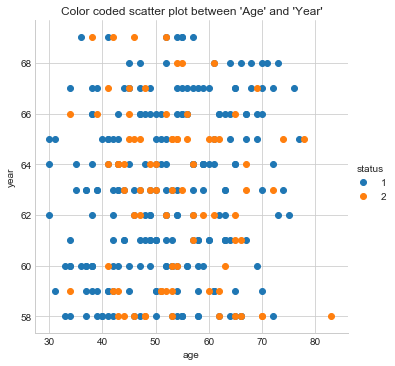

In [15]:
# Inferences can not be drawn from the above plots,
# let's try to use color-coding to dig further about the nuances present
sns.set_style("whitegrid");
sns.FacetGrid(habermans, hue="status", size=5) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("Color coded scatter plot between 'Age' and 'Year'")
plt.show();

# 4.2) Plots between "age" v/s "nodes" v/s "status"

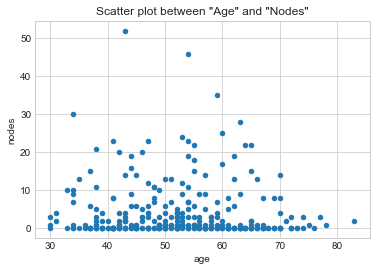

In [16]:
# Let's plot the graph between "age" v/s "nodes" and try to find the relation between age and number of nodes
habermans.plot(kind='scatter', x = 'age', y = 'nodes')
plt.title('Scatter plot between "Age" and "Nodes"')
plt.show()

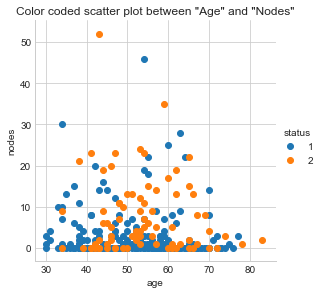

In [17]:
# let's try to use color-coding to 
sns.set_style("whitegrid");
sns.FacetGrid(habermans, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('Color coded scatter plot between "Age" and "Nodes"')
plt.show();

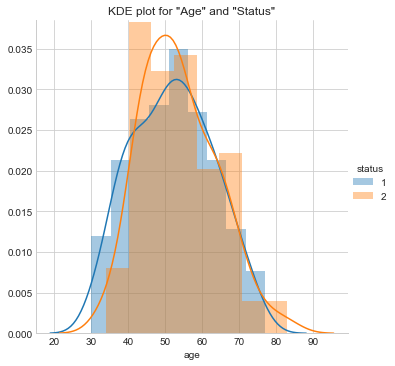

In [18]:
# Its seems that the number of nodes are more for middle age people than the younger and adults
# lets observ the trend using "KDE" plot between "age" and "status"
graph = sns.FacetGrid(habermans,hue='status',size = 5)
graph.map(sns.distplot,'age').add_legend()
plt.title('KDE plot for "Age" and "Status"')
plt.show()

In [19]:
# From the "KDE" plot, we can figure out that there is very much overlapping between ages having status "1" and status "2" 
# People with age less than 35, mainly having status "1" dominant and with age more than 75 status "2" is dominant and in between 
# there is so much of overlapping

# 4.3) Plots between "year" v/s "status" v/s "status"

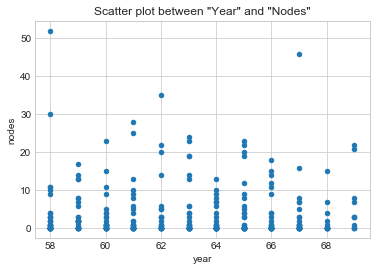

In [20]:
# Let's plot the scatter plot first between "year" and "nodes"
habermans.plot(kind='scatter',x = 'year', y = 'nodes')
plt.title('Scatter plot between "Year" and "Nodes"')
plt.show()

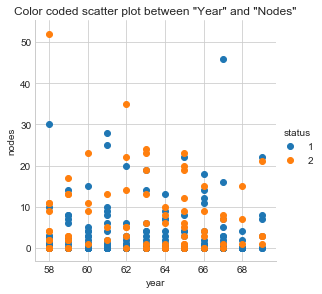

In [21]:
# let's try to use color-coding
sns.set_style("whitegrid");
sns.FacetGrid(habermans, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title('Color coded scatter plot between "Year" and "Nodes"')
plt.show();

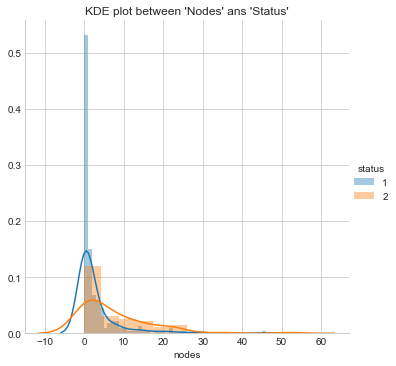

In [22]:
# The distribution between status "1" and "2" with respect to the nodes is pretty wide and hence difficult to get any inference
# Lets oberv "KDE" plot
graph = sns.FacetGrid(habermans,hue='status',size = 5)
graph.map(sns.distplot,'nodes').add_legend()
plt.title("KDE plot between 'Nodes' ans 'Status'")
plt.show()

Observations:

1) If the number of lymph nodes are very low, the persons chances to survive after 5 years (status) is very high as the number of nodes are high that might affect the persons health.
2) As the number of positive lymph nodes are high, the persons chances of survival are little as per the graph.
3) As the number of positive lymph nodes increases the persons chances of survival decreases.

# 5) Pair-Plot

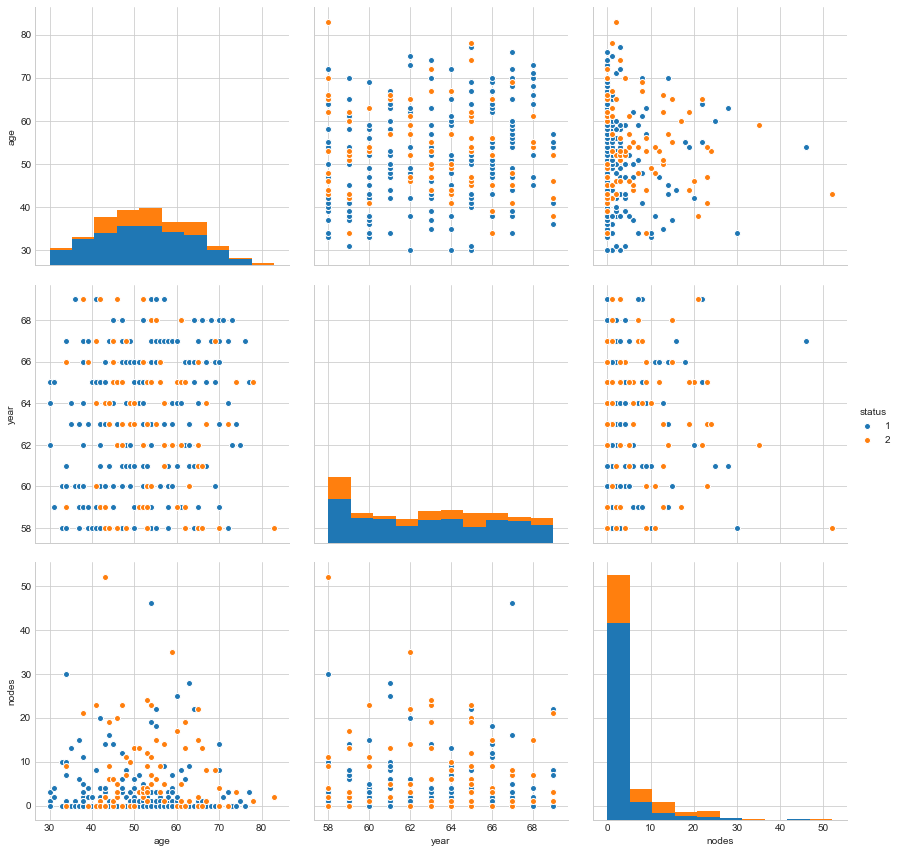

In [23]:
# Let's plot pairwise scatter plots that helps to determine the relationships or interdependence between differnt features
plt.close()
sns.set_style("whitegrid");
sns.pairplot(habermans, hue="status", vars=['age','year','nodes'], size = 4);
plt.show()

Obervations:

If the person having lesser number of positive lymph nodes then chances of survival is higher than those having higher number of positive lymph nodes.

# 6) Histograph, PDF, CDF

In [24]:
# Let's plot a Histographs and PDF for each feature and find which obne can have better impact on the target variable "status"

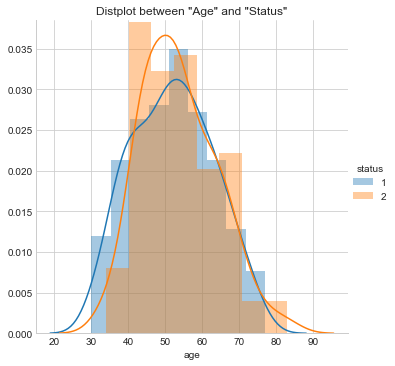

In [25]:
sns.FacetGrid(habermans, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Distplot between "Age" and "Status"')
plt.show();

Observation: When the age of the person undergoing operation is less than around 35, he is mostly survived and if the age is more than around 75, his chances of survival are the least

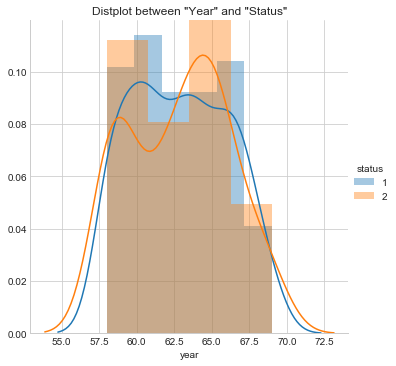

In [26]:
sns.FacetGrid(habermans, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Distplot between "Year" and "Status"')
plt.show();

Observation:
It is harder to find any distinction between here. As there is a very much overlapping and only "year" is not at all useful for survival "status" prediction.

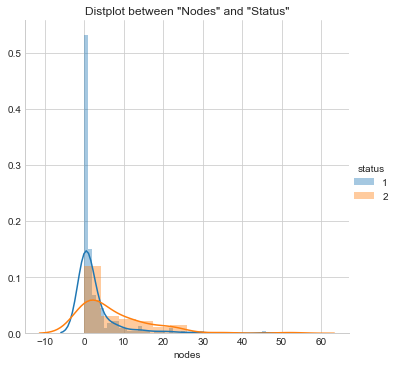

In [27]:
sns.FacetGrid(habermans, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Distplot between "Nodes" and "Status"')
plt.show();

Observation:
As per earlier inferences about "nodes" and "status", if the nodes are very less, then chances of survival "status" is very high as compared to the higher number of nodes.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


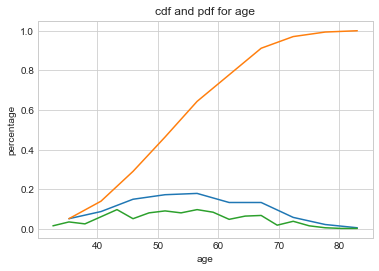

In [28]:
# Let's go with Cumulative Density Plots to have a better visualization of the data
# Plot CDF for "age"
counts, bin_edges = np.histogram(habermans['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(habermans['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel('age')
plt.ylabel('percentage')
plt.title('cdf and pdf for age')
plt.show();

Observations:
1) There are roughly 43% of people having age less than 50 years.
2) About 93% of the people are having age less than 70 years.

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


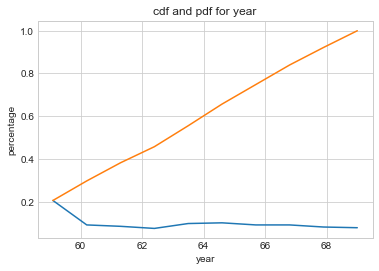

In [29]:
# Cumulative Density plot for "year"
counts, bin_edges = np.histogram(habermans['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute values for CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.ylabel('percentage')
plt.title('cdf and pdf for year')
plt.show();

Observations:
1) The number of people undergone operation between years 66 and 68 are approx as follow:
    Total number of people = 306.
    Total number of people undergone operation earlier to 68 is approx 92% of 306.
    Total number of people undergone operation earlier to 66 is approx 78% of 306.
    So people who undergone operation in between 66 and 68 is approx = 0.92 * 306 - 0.78 * 306 = 43. 

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


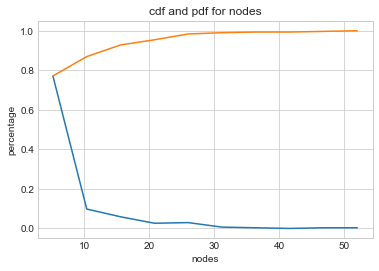

In [30]:
# Cumulative Density plot for "nodes"
counts, bin_edges = np.histogram(habermans['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute values for CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.ylabel('percentage')
plt.title('cdf and pdf for nodes')
plt.show();

Observations:
1) Around 97% of the people are having nodes less than 25
2) Number of people having nodes between 30 and 52 aprrox. (there are very few such people) = 99.99% of 306 - 98.99% of 306 = 3.

# 7) Box-Plot and Whiskers

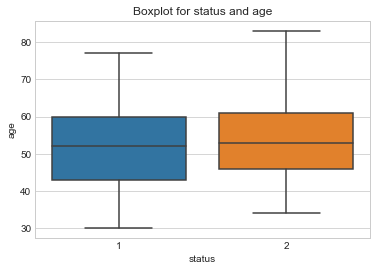

In [31]:
# Box-Plots and Whiskers are the more intuitive way for analysing 1-D scatter plots
# That helps to determine the mean, median and other attributes of the data
# Box plot between "age" and "status"
sns.boxplot(x = 'status', y = 'age', data = habermans)
plt.title("Boxplot for status and age")
plt.show()

Observations:
1) For data that belongs to status "1":
    i) Median lies at = 52 (approx.).
    ii) 1st(25th IQR) Inter-Quartile lies at = 42 (approx.).
    iii) 3rd (75th IQR) Inter-Quartile lies at = 60 (approx.).
2) For data that belongs to status "2":
    i) Median lies at = 54 (approx.).
    ii) 1st(25th IQR) Inter-Quartile lies at = 46 (approx.).
    iii) 3rd (75th IQR) Inter-Quartile lies at = 63 (approx.)
3) Min. value lies at 30 and max. value at 77 for status "1".
4) Min. value lies at 34 and max. value at 83 for status "2".
5) There seems to be no outliers present for "age" feature.

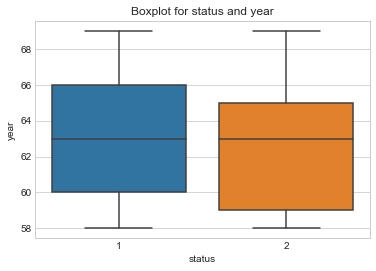

In [32]:
# Box plot between "age" and "status"
sns.boxplot(x = 'status', y = 'year', data = habermans)
plt.title("Boxplot for status and year")
plt.show()

Observations:
1) For data that belongs to status "1":
    i) Median lies at = 63 (approx.).
    ii) 1st(25th IQR) Inter-Quartile lies at = 60.
    iii) 3rd (75th IQR) Inter-Quartile lies at = 66.
2) For data that belongs to status "2":
    i) Median lies at = 63 (approx.).
    ii) 1st(25th IQR) Inter-Quartile lies at = 59.
    iii) 3rd (75th IQR) Inter-Quartile lies at = 65.
3) Min. value lies at 58 and max. value at 66 for status "1".
4) Min. value lies at 59 and max. value at 63 for status "2".
5) There seems to be no outliers present for "year" feature.

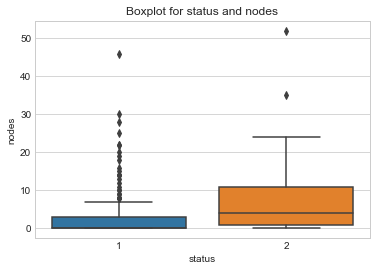

In [33]:
# Box plot between "nodes" and "status"
sns.boxplot(x = 'status', y = 'nodes', data = habermans)
plt.title("Boxplot for status and nodes")
plt.show()

Observations:
1) For data that belongs to status "1" label:
    i) Median lies at = 0 (approx.).
    ii) 1st(25th IQR) Inter-Quartile lies at = 0.
    iii) 3rd (75th IQR) Inter-Quartile lies at = 3.
2) For data that belongs to status "2":
    i) Median lies at = 3 (approx.).
    ii) 1st(25th IQR) Inter-Quartile lies at = 0.5 (approx.).
    iii) 3rd (75th IQR) Inter-Quartile lies at = 11 (approx.)
3) Min. value lies at 0 and max. value at 33 for status "1".
4) Min. value lies at 0.5 and max. value at 12 for status "2".
5) The number of outliers present for "nodes" that belongs to status "1" is more than those that belongs to status "2".

# 8) Violin Plots

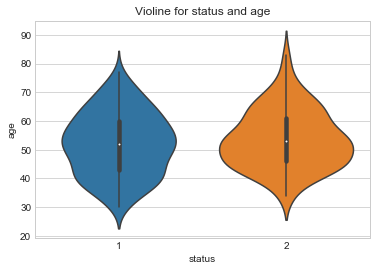

In [34]:
# In violin plots, denser data is signified by a fatter region whereas the sparser with thinner region

sns.violinplot(x="status", y="age", data=habermans, size=8)
plt.title("Violine for status and age")
plt.show()

Observation:
1) As from the box-plots, the mean and inter-quartile range is as expected.
2) The insdtances or data points that belongs to the status "1" is generally more densely distributed as compared to the data points that belongs to status "2" which are more denser at the bottom values.

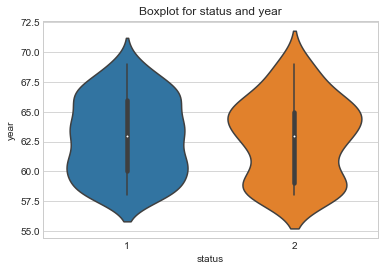

In [35]:
sns.violinplot(x="status", y="year", data=habermans, size=8)
plt.title("Boxplot for status and year")
plt.show()

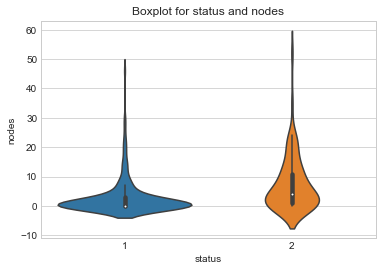

In [36]:
sns.violinplot(x="status", y="nodes", data=habermans, size=8)
plt.title("Boxplot for status and nodes")
plt.show()

Observation:
1) In above violin plots, the data for instances belonging to the status "1" are mostly lies within 0 to 8 approximately.
2) Similar situation for status "2" instances where majorly nodes lies between 0 to 30.

#  9) Mean, Median and Std-dev

In [37]:
# Calculate the Mean, Median and Standard-Deviation
habermans_1 = habermans.loc[habermans["status"] == 1]
habermans_2 = habermans.loc[habermans["status"] == 2]

#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(habermans_1["age"]))
#Mean with an outlier.
print(np.mean(np.append(habermans_1["age"],50)));
print(np.mean(habermans_1["age"]))

print("\nStd-dev:");
print(np.std(habermans_1["age"]))
print(np.std(habermans_2["age"]))


Means:
52.01777777777778
52.008849557522126
52.01777777777778

Std-dev:
10.98765547510051
10.10418219303131


# 10) Median, Percentile, Quantile, MAD, IQR

In [38]:
# Calculation of Median, Quantiles, Percentiles, IQR, based on nodes
print("\nMedians:")
print("Status 1:-",np.median(habermans_1["nodes"]))
print("Status 2:-", np.median(habermans_2["nodes"]))

# Calculate the Median with an outlier
print("status 1:-",np.median(np.append(habermans_1["nodes"],50)))
print("status 2:-",np.median(habermans_2["nodes"]))


print("\nQuantiles:")
print("status 1:-",np.percentile(habermans_1["nodes"],np.arange(0, 100, 25)))
print("status 2:-",np.percentile(habermans_2["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("status 1:-",np.percentile(habermans_1["nodes"],90))
print("status 2:-",np.percentile(habermans_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("status 1:-",robust.mad(habermans_1["nodes"]))
print("status 2:-",robust.mad(habermans_2["nodes"]))



Medians:
Status 1:- 0.0
Status 2:- 4.0
status 1:- 0.0
status 2:- 4.0

Quantiles:
status 1:- [0. 0. 0. 3.]
status 2:- [ 0.  1.  4. 11.]

90th Percentiles:
status 1:- 8.0
status 2:- 20.0

Median Absolute Deviation
status 1:- 0.0
status 2:- 5.930408874022408


Observations:
1) The Median for status "1" and status "2" is 0.0 and 4.0 respectively.
2) The Inter-Quantile range for status "1" is [0., 0., 0., 3.] with 0th, 25th, 75th and 100th Quantiles respectively.
3) The Inter-Quantile range for status "1" is [ 0.  1.  4. 11.] with 0th, 25th, 75th and 100th Quantiles respectively.
